In [1]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [376]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from shapely.geometry import Point
import rasterio as rio
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.warp import calculate_default_transform, reproject, Resampling
from pyproj import Proj, transform

import warnings
warnings.filterwarnings('ignore')

# Get data and set working directory
# data = et.data.get_data('spatial-vector-lidar')
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
# Downloading from https://ndownloader.figshare.com/files/12459464 
# Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

https://www.earthdatascience.org/courses/intermediate-earth-data-science-textbook/

# Chapter 2 - Spatial Vector Data 

## Plotting Shape File

In [3]:
# Define path to file
plot_centroid_path = os.path.join("./data", "spatial-vector-lidar", 
                                  "california", "neon-sjer-site", 
                                  "vector_data", "SJER_plot_centroids.shp")

# # Import shapefile using geopandas
sjer_plot_locations = gpd.read_file(plot_centroid_path)

In [4]:
sjer_plot_locations.head(6)

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.570)


In [7]:
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

In [8]:
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [9]:
sjer_plot_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 120°W to 114°W - by country
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

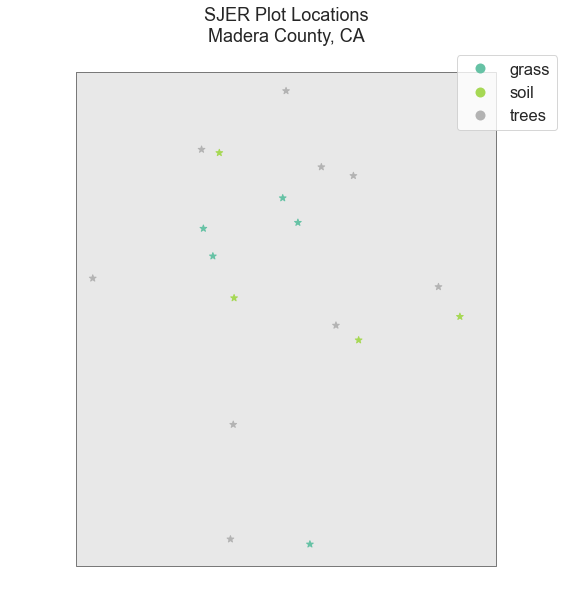

In [56]:
# Define path to crop boundary
sjer_crop_extent_path = os.path.join("data", "spatial-vector-lidar", 
                                     "california", "neon-sjer-site", 
                                     "vector_data", "SJER_crop.shp")

# Import crop boundary
sjer_crop_extent = gpd.read_file(sjer_crop_extent_path)
fig, ax = plt.subplots(figsize=(10, 10))

# First setup the plot using the crop_extent layer as the base layer
sjer_crop_extent.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=.5,
                      ax=ax)

# Add another layer using the same ax
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50,
                         cmap='Set2', ax=ax)
# Clean up axes
ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()

plt.axis('equal')
plt.show()

## CRS - Coordinate Reference System

In [12]:
worldBound_path = os.path.join("./data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

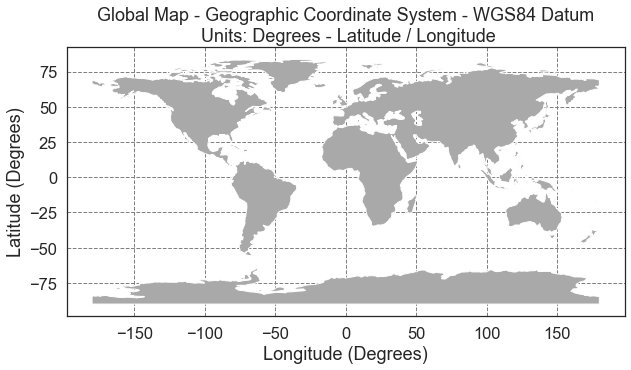

In [13]:
# Plot worldBound data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
worldBound.plot(color='darkgrey', 
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')

In [19]:
# Create numpy array of x,y point locations
add_points = np.array([[-105.2519,   40.0274], 
                       [  10.75  ,   59.95  ], 
                       [   2.9833,   39.6167]])

# Turn points into list of x,y shapely points 
city_locations = [Point(xy) for xy in add_points]
city_locations

In [20]:
# Create geodataframe using the points
city_locations = gpd.GeoDataFrame(city_locations, 
                                  columns=['geometry'],
                                  crs=worldBound.crs)
city_locations.head(3)

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (10.75000 59.95000)
2,POINT (2.98330 39.61670)


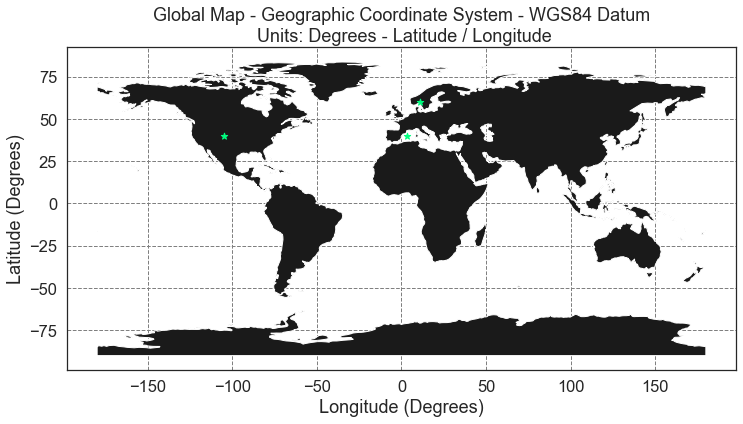

In [21]:
# Plot point locations
fig, ax = plt.subplots(figsize=(12, 8))

worldBound.plot(figsize=(10, 5), color='k',
               ax=ax)
# Add city locations
city_locations.plot(ax=ax, 
                    color='springgreen', 
                    marker='*',
                    markersize=45)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

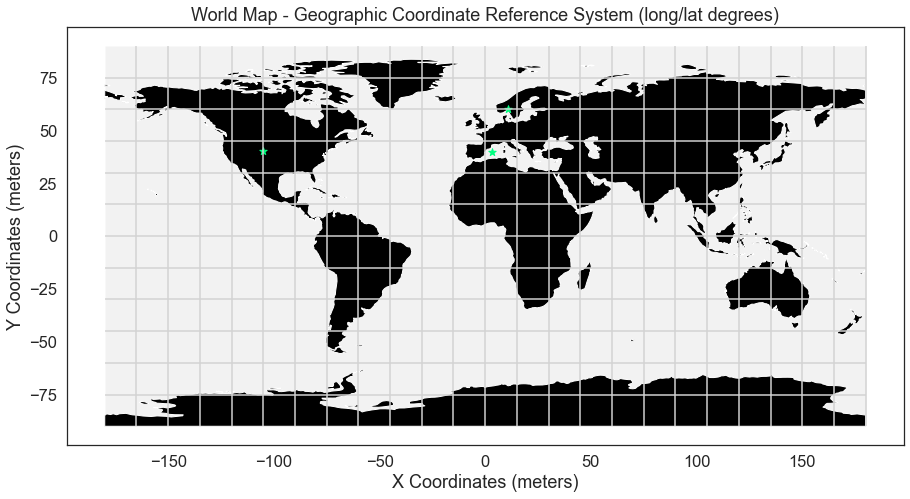

In [22]:
# Import graticule & world bounding box shapefile data
graticule_path = os.path.join("data", "spatial-vector-lidar", "global", 
                              "ne_110m_graticules_all", "ne_110m_graticules_15.shp")
graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join("data", "spatial-vector-lidar", "global", 
                         "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")
bbox = gpd.read_file(bbox_path)

# Create map axis object
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Add bounding box and graticule layers
bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='black')

# Add points to plot 
city_locations.plot(ax=ax, 
                    markersize=60, 
                    color='springgreen',
                    marker='*')
# Add title and axes labels
ax.set(title="World Map - Geographic Coordinate Reference System (long/lat degrees)",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)");

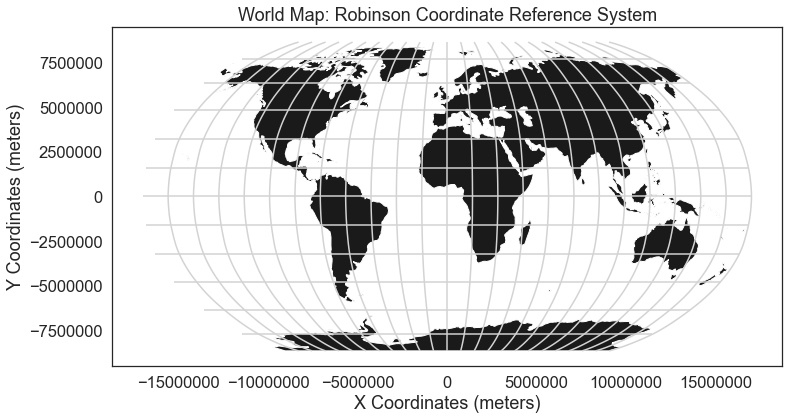

In [23]:
# Reproject the data
worldBound_robin = worldBound.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')

graticule_robin.plot(ax=ax, color='lightgrey')

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

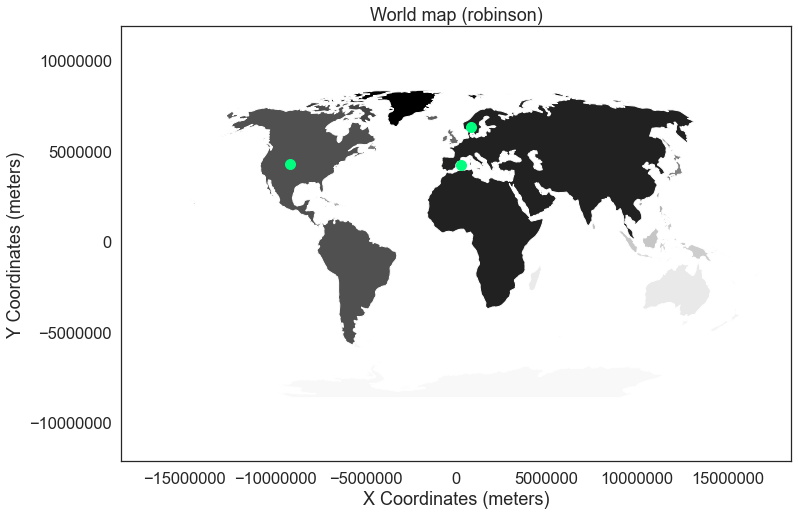

In [25]:
# Reproject point locations to the Robinson projection
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
worldBound_robin.plot(ax=ax, 
                      cmap='Greys')
ax.set(title="World map (robinson)", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
city_locations_robin.plot(ax=ax, markersize=100, color='springgreen')

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis('equal');

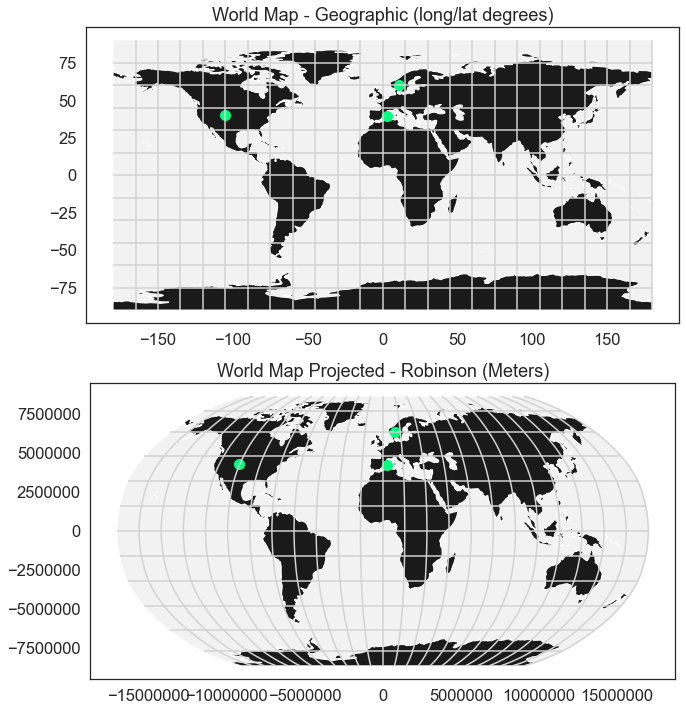

In [26]:
# Reproject graticules and bounding box  to robinson
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

# Setup plot with 2 "rows" one for each map and one column
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(13, 12))

# First plot
bbox.plot(ax=ax0,
          alpha=.1,
          color='grey')

graticule.plot(ax=ax0,
               color='lightgrey')

worldBound.plot(ax=ax0,
                color='k')

city_locations.plot(ax=ax0,
                    markersize=100,
                    color='springgreen')

ax0.set(title="World Map - Geographic (long/lat degrees)")

# Second plot
bbox_robinson.plot(ax=ax1,
                   alpha=.1,
                   color='grey')

graticule_robinson.plot(ax=ax1,
                        color='lightgrey')

worldBound_robin.plot(ax=ax1,
                      color='k')

city_locations_robin.plot(ax=ax1,
                          markersize=100,
                          color='springgreen')

ax1.set(title="World Map Projected - Robinson (Meters)")

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

## Geographic vs projected coordinate reference system

Geographic coordinate systems (which are often but not always in decimal degree units) are often optimal when you need to locate places on the Earth. Or when you need to create global maps. However, latitude and longitude locations are not located using uniform measurement units. Thus, geographic CRSs are not ideal for measuring distance. This is why other projected CRS have been developed.

![image](https://www.earthdatascience.org/images/earth-analytics/spatial-data/latitude-longitude-globe-ESRI.gif) 

A geographic coordinate system locates latitude and longitude location using angles. Thus the spacing of each line of latitude moving north and south is not uniform. Source: ESRI

### UTM Coordinates 

Attempt at plotting utilizing the 2957 UTM Method

About UTM

The Universal Transverse Mercator (UTM) system is a commonly used projected coordinate reference system. UTM subdivides the globe into zones, numbered 0-60 (equivalent to longitude) and regions (north and south)

/Users/purgatorid/.local/share/virtualenvs/tiff-explore-TwY5KnPB/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


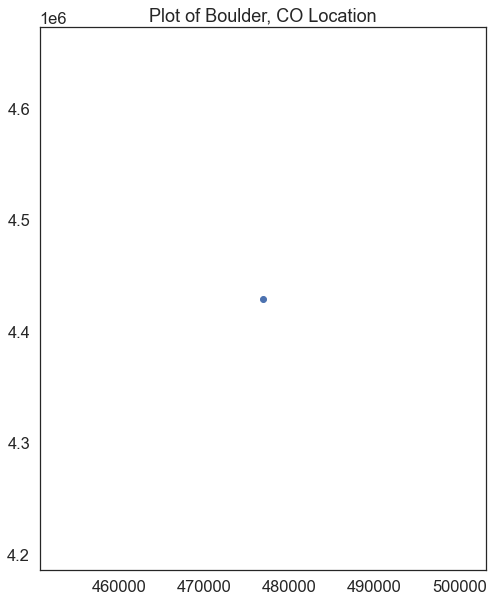

In [41]:
boulder_df = np.array([[476911.31,  4429455.35]])
geometry = [Point(xy) for xy in boulder_df]

boulder_loc = gpd.GeoDataFrame(geometry,
                               columns=['geometry'],
                               crs={'init': 'epsg:2957'})
fig, ax = plt.subplots(figsize=(8, 10))
boulder_loc.plot(ax=ax)
ax.set_aspect('auto')
ax.set_title("Plot of Boulder, CO Location")

plt.show()

In [47]:
boulder_loc.crs

<Projected CRS: EPSG:2957>
Name: NAD83(CSRS) / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - 108°W to 102°W
- bounds: (-108.0, 48.99, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

If you spatially project your data into a geographic coordinate refence system, notice how your new coordinates are different - yet they still represent the same location.

In [48]:
boulder_df_geog = boulder_loc.to_crs(epsg=4326)
boulder_df_geog.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

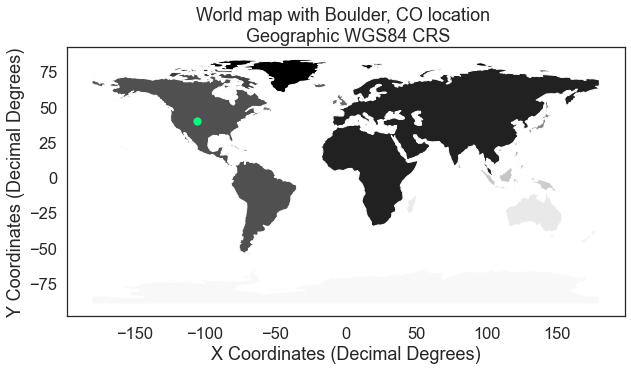

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

worldBound.plot(cmap='Greys',
                ax=ax)

ax.set(title="World map with Boulder, CO location \n Geographic WGS84 CRS",
       xlabel="X Coordinates (Decimal Degrees)",
       ylabel="Y Coordinates (Decimal Degrees)")

boulder_df_geog.plot(ax=ax,
                     markersize=52,
                     color='springgreen')
plt.show()

## Practice - Chapter 2


In [47]:
roads_path = "./data/spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp"
crop_path = "./data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp"



roads_path_locations = gpd.read_file(roads_path)
crop_path_locations = gpd.read_file(crop_path)

In [48]:
roads_path_locations

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110454239066,N 14th St,M,S1400,"LINESTRING (-120.27227 37.11615, -120.27244 37..."
1,110454239052,N 11th St,M,S1400,"LINESTRING (-120.26788 37.11667, -120.26807 37..."
2,110454239056,N 12th St,M,S1400,"LINESTRING (-120.27053 37.11749, -120.27045 37..."
3,110454239047,N 10th St,M,S1400,"LINESTRING (-120.26703 37.11735, -120.26721 37..."
4,110454243091,N Westberry Blvd,M,S1400,"LINESTRING (-120.10122 36.96524, -120.10123 36..."
...,...,...,...,...,...
9635,110454244324,Kings Canyon Ct N,M,S1400,"LINESTRING (-119.77493 37.18221, -119.77481 37..."
9636,110454242718,Gold Dust Ct N,M,S1400,"LINESTRING (-119.71746 37.23623, -119.71739 37..."
9637,110454243105,Whitworth Dr N,M,S1400,"LINESTRING (-120.08446 37.01512, -120.08440 37..."
9638,110454241750,Cascadel Dr N,M,S1400,"LINESTRING (-119.45740 37.22955, -119.45721 37..."


In [50]:
roads_path_locations.geom_type

0       LineString
1       LineString
2       LineString
3       LineString
4       LineString
           ...    
9635    LineString
9636    LineString
9637    LineString
9638    LineString
9639    LineString
Length: 9640, dtype: object

In [52]:
roads_path_locations.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [49]:
crop_path_locations

,Id,geometry
0,0,"POLYGON ((254570.567 4112361.920, 258867.409 4..."


In [51]:
crop_path_locations.geom_type

0    Polygon
dtype: object

In [53]:
crop_path_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 120°W to 114°W - by country
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

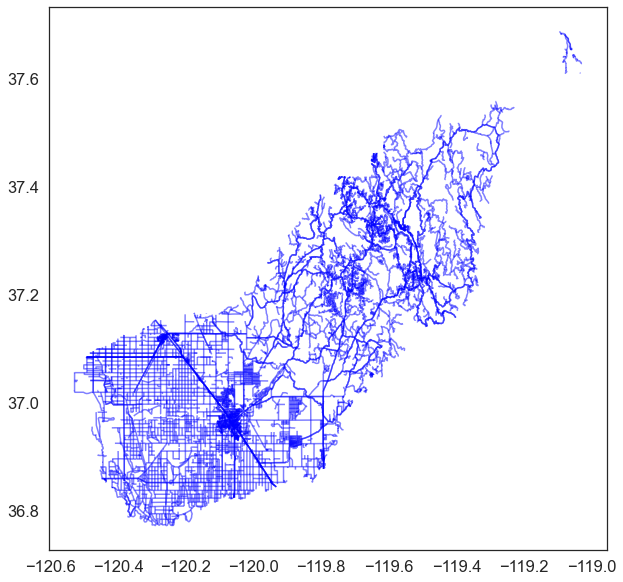

In [75]:
fig,ax = plt.subplots(figsize= (10,10))
roads_path_locations.plot(
    color='blue',
    alpha=.5,
    ax=ax)
# crop_path_locations.plot(
#     markersize=50,
#     categorical=True,
#     ax=ax)
ax.set_aspect('auto')
plt.show()

## WKT (Well-known Text) using Pyproj for ESPGS Lookups

In [30]:
from pyproj import CRS

In [31]:
crs = CRS.from_epsg(4326)

In [38]:
def epsgs_lookup(epsgs):
    crs = CRS.from_epsg(epsgs)
    print(crs.to_wkt(pretty=True))

epsgs_lookup(32611)

PROJCRS["WGS 84 / UTM zone 11N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 11N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-117,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["metre",1],
            ID["EPSG",8

In [39]:
epsgs_lookup(4326)

GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]


In [41]:
epsgs_lookup(32634)

PROJCRS["WGS 84 / UTM zone 34N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 34N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",21,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["metre",1],
            ID["EPSG",880

In [43]:
epsgs_lookup(2957)

PROJCRS["NAD83(CSRS) / UTM zone 13N",
    BASEGEOGCRS["NAD83(CSRS)",
        DATUM["NAD83 Canadian Spatial Reference System",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4617]],
    CONVERSION["UTM zone 13N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-105,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["metre",1]

# Chapter 3 - Raster Data 

In [78]:
lidar_dem_path = os.path.join("./data/","colorado-flood", "spatial",
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DTM.tif")

In [103]:
with rio.open(lidar_dem_path) as dem_src:
    lidar_dem_arr = dem_src.read(1)
    print(dem_src.nodatavals)

(-3.4028234663852886e+38,)


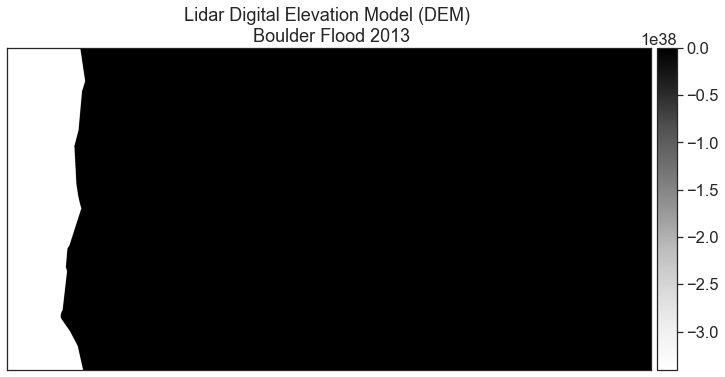

In [82]:
ep.plot_bands(lidar_dem_arr,
              title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")

plt.show()

In [83]:
print("the minimum raster value is: ", lidar_dem_arr.min())
print("the maximum raster value is: ", lidar_dem_arr.max())

the minimum raster value is:  -3.4028235e+38
the maximum raster value is:  2087.43


In [86]:
len(lidar_dem_arr)

2000

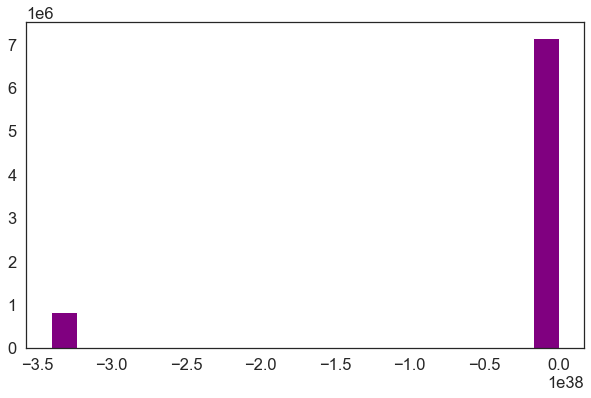

In [104]:
ep.hist(lidar_dem_arr,
       figsize=(10,6))
plt.show()

In [113]:
with rio.open(lidar_dem_path) as dem_src:
    lidar_dem_arr = dem_src.read(1, masked=True)
    print(dem_src.profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4000, 'height': 2000, 'count': 1, 'crs': CRS.from_epsg(32613), 'transform': Affine(1.0, 0.0, 472000.0,
       0.0, -1.0, 4436000.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


In [106]:
print("the minimum raster value is: ", lidar_dem_arr.min())
print("the maximum raster value is: ", lidar_dem_arr.max())

the minimum raster value is:  1676.21
the maximum raster value is:  2087.43


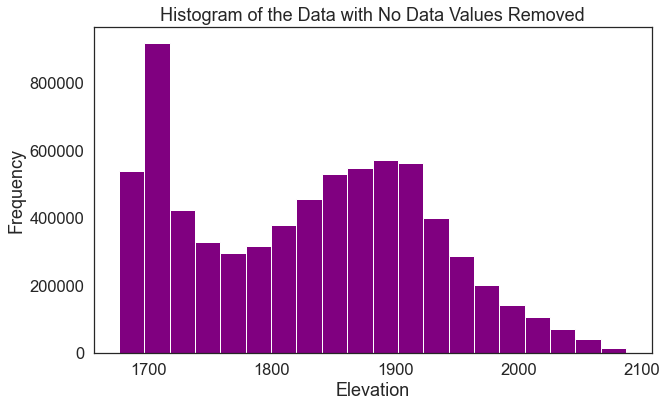

In [136]:
ep.hist(lidar_dem_arr,
        figsize=(10,6),
        xlabel="Elevation",
        ylabel="Frequency",
        title="Histogram of the Data with No Data Values Removed"),


plt.show()

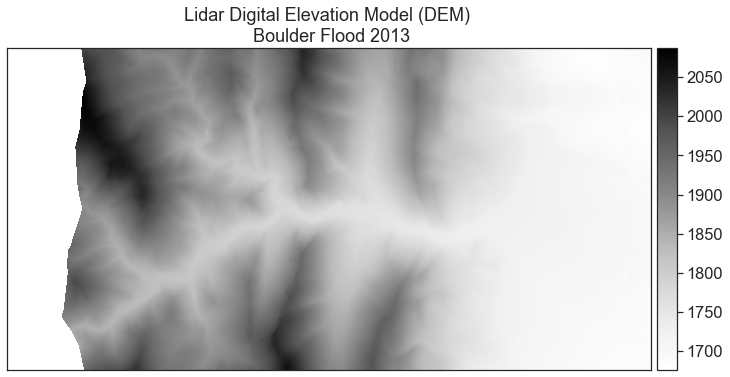

In [108]:
# Plot data using earthpy
ep.plot_bands(lidar_dem_arr,
              title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")

plt.show()

In [114]:
lidar_dem_arr.shape

(2000, 4000)

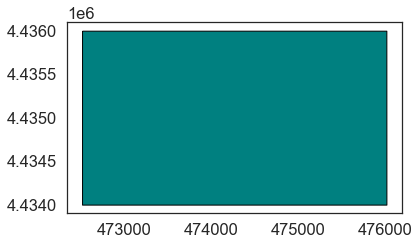

In [115]:
# Open site boundary vector layer
site_bound_path = os.path.join("./data","colorado-flood",
                               "spatial",
                               "boulder-leehill-rd",
                               "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)

# Plot the vector data
site_bound_shp.plot(color='teal',
                    edgecolor='black')
plt.show()

In [116]:
with rio.open(lidar_dem_path) as dem_src:
    lidar_dem_im = dem_src.read(1, masked=True)
    # Create an object called lidar_dem_meta that contains the spatial metadata
    lidar_dem_plot_ext = plotting_extent(dem_src)

In [117]:
lidar_dem_plot_ext

(472000.0, 476000.0, 4434000.0, 4436000.0)

**Conversion success, this is in boulder!**

In [133]:
inProj = Proj(init='epsg:32613')
outProj = Proj(init='epsg:4326')
x1,y1 = 472000.0,4434000.0
transform(inProj,outProj,x1,y1)

(-105.32829062046481, 40.05578085296427)

In [132]:
x1,y1 = 472000.0,4436000.0
transform(inProj,outProj,x1,y1)

(-105.32837712340127, 40.07379996020845)

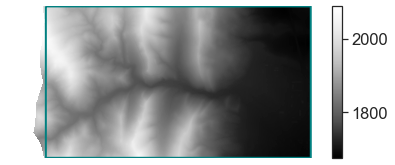

In [130]:
fig, ax = plt.subplots()

ep.plot_bands(lidar_dem_arr,
              ax=ax,
              extent=lidar_dem_plot_ext)

site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax)
# Turn off the outline or axis border on your plot
ax.axis('off')
plt.show()

## CRS, Resolution, and Extent in Python 

In [138]:
lidar_dem_path = os.path.join("./data", "colorado-flood", "spatial", 
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DTM.tif")

In [140]:
with rio.open(lidar_dem_path) as src:
    print(src.crs)
    myCRS = src.crs    

EPSG:32613


In [142]:
len(list(et.epsg.keys()))

5006

In [143]:
list(et.epsg.keys())[:10]

['29188',
 '26733',
 '24600',
 '32189',
 '4899',
 '29189',
 '26734',
 '7402',
 '26951',
 '29190']

In [165]:
proj4 = et.epsg['32613']
proj4

'+proj=utm +zone=13 +datum=WGS84 +units=m +no_defs'

In [166]:
crs_proj4 = rio.crs.CRS.from_string(proj4)
crs_proj4

CRS.from_epsg(32613)

In [167]:
with rio.open(lidar_dem_path) as src:
    print(src.bounds)

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)


In [169]:
#resolution of the data - each pixel is 1x1 meter

src.res

(1.0, 1.0)

# Chapter 4 GEOTIFF Format 

In [180]:
lidar_dem_path = os.path.join("data", "colorado-flood", "spatial", 
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DTM.tif")

with rio.open(lidar_dem_path) as lidar_dem:
    print(lidar_dem.bounds)
#     print(lidar_dem.meta)
    print(lidar_dem.profile)
    print(lidar_dem.res)
    lidar_dem = lidar_dem
    

BoundingBox(left=472000.0, bottom=4434000.0, right=476000.0, top=4436000.0)
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4000, 'height': 2000, 'count': 1, 'crs': CRS.from_epsg(32613), 'transform': Affine(1.0, 0.0, 472000.0,
       0.0, -1.0, 4436000.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}
(1.0, 1.0)


# Chapter 5 - Process Raster Data

Import Digital Surface Model (DSM)

You will open the digital surface model (DSM). The DSM represents the top of the earth’s surface. Thus, it includes trees, buildings and other objects that sit on the earth.

In [183]:
lidar_dsm_path = os.path.join("data", "colorado-flood", "spatial", 
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DSM.tif")

with rio.open(lidar_dsm_path) as lidar_dsm:
    lidar_dsm_im = lidar_dsm.read(1, masked=True)
    
lidar_dsm_im

masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.5899658203125,
         1696.3900146484375],
        [--, --, --, ..., 1695.5999755859375, 1695.6300048828125, 1697.0],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.449951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.402823e+38,
  dtype=float32)

Open and plot the lidar digital elevation model (DEM)

In [185]:
# Define relative path to file
lidar_dem_path = os.path.join("data", "colorado-flood", "spatial", 
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DTM.tif")

# Open raster data
with rio.open(lidar_dem_path) as lidar_dem:
    lidar_dem_im = lidar_dem.read(1, masked=True)
    
    # Get bounds for plotting
    bounds = plotting_extent(lidar_dem)

lidar_dem_im

masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.419921875,
         1695.429931640625],
        [--, --, --, ..., 1695.5999755859375, 1695.5399169921875,
         1695.3599853515625],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.3699951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)

**Canopy Height Model**

The canopy height model (CHM) represents the HEIGHT of the trees. This is not an elevation value, rather it’s the height or distance between the ground and the top of the trees (or buildings or whatever object that the lidar system detected and recorded).

Some canopy height models also include buildings, so you need to look closely at your data to make sure it was properly cleaned before assuming it represents all trees!

Calculate difference between two rasters
There are different ways to calculate a CHM. One easy way is to subtract the DEM from the DSM.

**DSM - DEM = CHM**

This math gives you the residual value or difference between the top of the earth surface and the ground which should be the heights of the trees (and buildings if the data haven’t been “cleaned”).

In [301]:
lidar_chm_im = lidar_dsm_im - lidar_dem_im

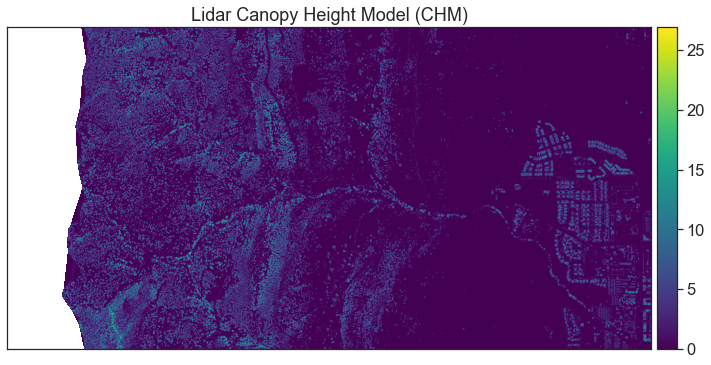

In [187]:
# Plot the data
ep.plot_bands(lidar_chm_im, 
              cmap='viridis',
              title="Lidar Canopy Height Model (CHM)",
              scale=False)
plt.show()

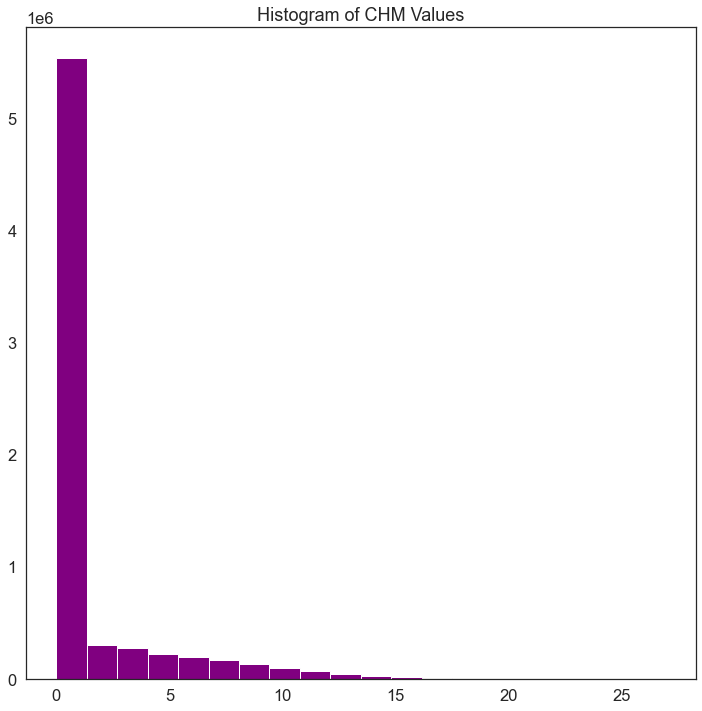

In [188]:
ep.hist(lidar_chm_im, 
        colors = 'purple',
        title="Histogram of CHM Values")
plt.show()

In [189]:
nodatavalue = -999.0
lidar_chm_im_fi = np.ma.filled(lidar_chm_im, fill_value=nodatavalue)
lidar_chm_im_fi.min(), nodatavalue

(-999.0, -999.0)

In [190]:
# Update the metadata to ensure the nodata value is properly documented 

# Create dictionary copy
chm_meta = lidar_dem.meta.copy()

# Update the nodata value to be an easier to use number
chm_meta.update({'nodata': nodatavalue})
chm_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -999.0,
 'width': 4000,
 'height': 2000,
 'count': 1,
 'crs': CRS.from_epsg(32613),
 'transform': Affine(1.0, 0.0, 472000.0,
        0.0, -1.0, 4436000.0)}

## Classify and Plot Raster

In [191]:
# Define relative paths to DTM and DSM files
dtm_path = os.path.join("data", "colorado-flood", "spatial",
                        "boulder-leehill-rd", "pre-flood", "lidar",
                        "pre_DTM.tif")

dsm_path = os.path.join("data", "colorado-flood", "spatial",
                        "boulder-leehill-rd", "pre-flood", "lidar",
                        "pre_DSM.tif")

# Open DTM and DSM files
with rio.open(dtm_path) as src:
    lidar_dtm_im = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)

with rio.open(dsm_path) as src:
    lidar_dsm_im = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)

# Create canopy height model (CHM)    
lidar_chm_im = lidar_dsm_im - lidar_dtm_im
lidar_chm_im

masked_array(
  data=[[--, --, --, ..., 0.0, 0.1700439453125, 0.9600830078125],
        [--, --, --, ..., 0.0, 0.090087890625, 1.6400146484375],
        [--, --, --, ..., 0.0, 0.0, 0.0799560546875],
        ...,
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.402823e+38,
  dtype=float32)

In [192]:
lidar_chm_im.fill_value

-3.402823e+38

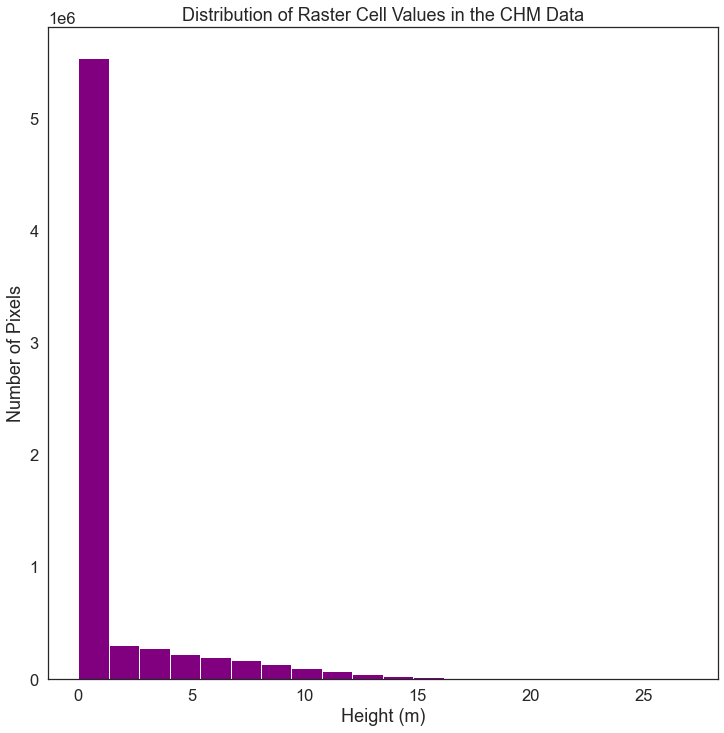

In [193]:
ep.hist(lidar_chm_im.ravel(),
        title="Distribution of Raster Cell Values in the CHM Data",
        xlabel="Height (m)",
        ylabel="Number of Pixels")

plt.show()

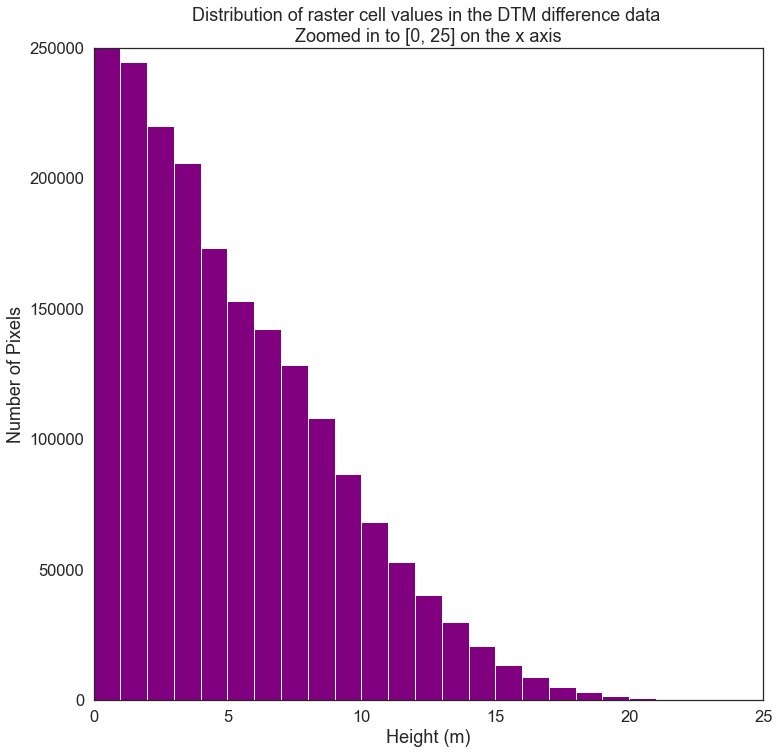

In [220]:
# Create histogram with xlim and ylim
xlim = [0, 25]

f, ax = ep.hist(lidar_chm_im.ravel(),
                hist_range=xlim,
                bins=range(*xlim),
                ylabel="Number of Pixels", xlabel="Height (m)",
                title="Distribution of raster cell values in the DTM difference data \n" +
                      "Zoomed in to {} on the x axis".format(xlim))

ax.set(xlim=xlim, ylim=[0, 250000])

plt.show()

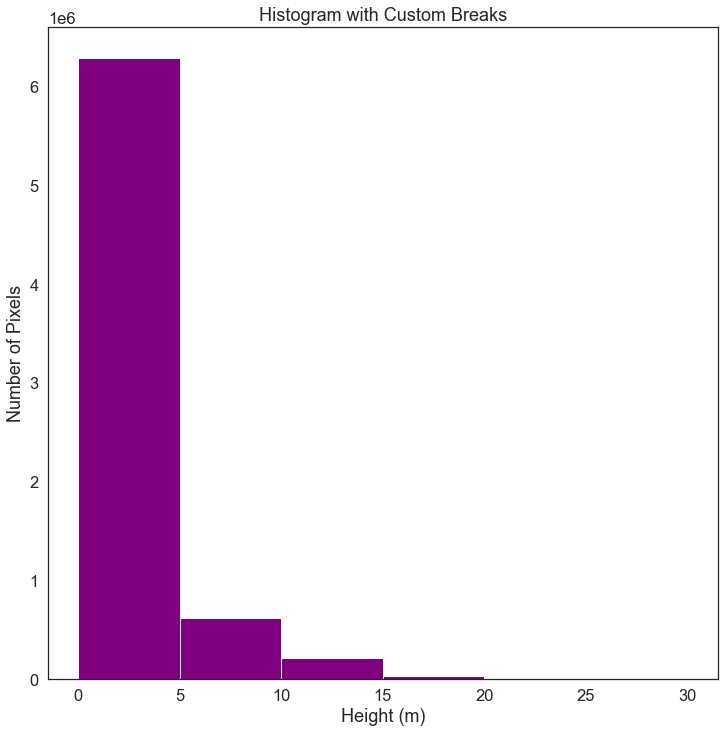

In [195]:
# Histogram with custom breaks
ep.hist(lidar_chm_im.ravel(),
        bins=[0, 5, 10, 15, 20, 30],
        title="Histogram with Custom Breaks",
        xlabel="Height (m)", 
        ylabel="Number of Pixels")

plt.show()

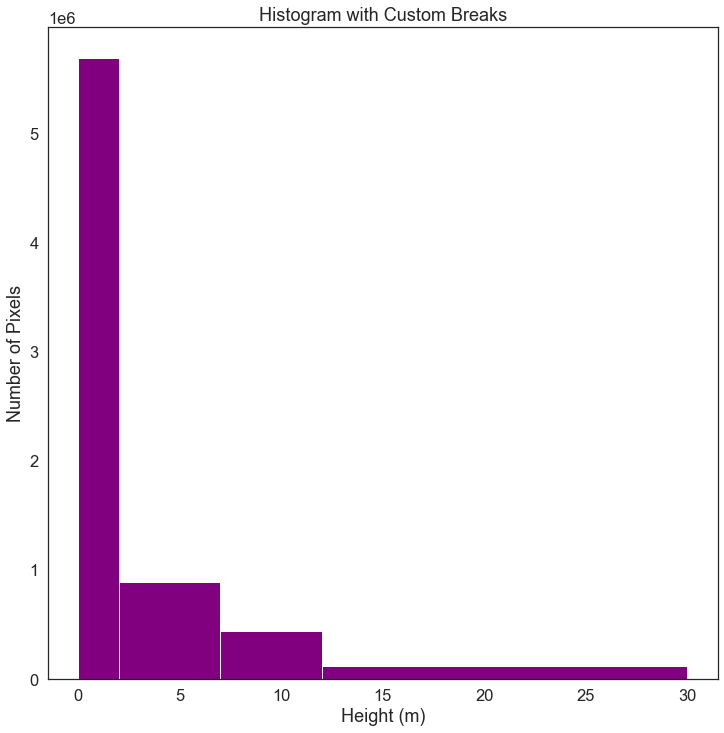

In [196]:
ep.hist(lidar_chm_im.ravel(),
        colors='purple',
        bins=[0, 2, 7, 12, 30],
        title="Histogram with Custom Breaks",
        xlabel="Height (m)",
        ylabel="Number of Pixels")

plt.show()

In [197]:
# Define bins that you want, and then classify the data
class_bins = [lidar_chm_im.min(), 2, 7, 12, np.iinfo(np.int32).max]

# Classify the original image array, then unravel it again for plotting
lidar_chm_im_class = np.digitize(lidar_chm_im, class_bins)

# Note that you have an extra class in the data (0)
print(np.unique(lidar_chm_im_class))

[0 1 2 3 4]


In [198]:
lidar_chm_class_ma = np.ma.masked_where(lidar_chm_im_class == 0,
                                        lidar_chm_im_class,
                                        copy=True)
lidar_chm_class_ma

masked_array(
  data=[[--, --, --, ..., 1, 1, 1],
        [--, --, --, ..., 1, 1, 1],
        [--, --, --, ..., 1, 1, 1],
        ...,
        [--, --, --, ..., 1, 1, 1],
        [--, --, --, ..., 1, 1, 1],
        [--, --, --, ..., 1, 1, 1]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=999999)

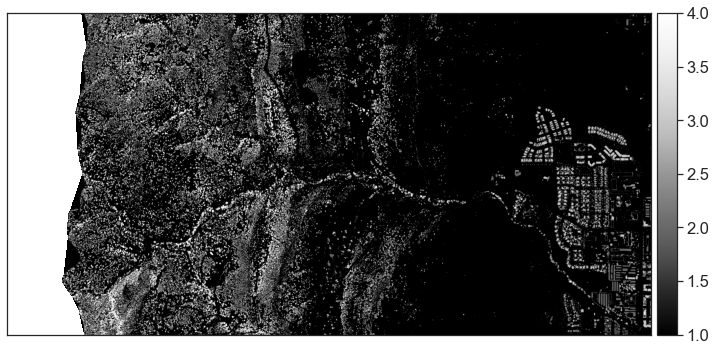

In [199]:
# Plot newly classified and masked raster
ep.plot_bands(lidar_chm_class_ma,
              scale=False)
plt.show()

In [201]:
# Check classes
np.unique(lidar_chm_class_ma)


masked_array(data=[1, 2, 3, 4, --],
             mask=[False, False, False, False,  True],
       fill_value=999999)

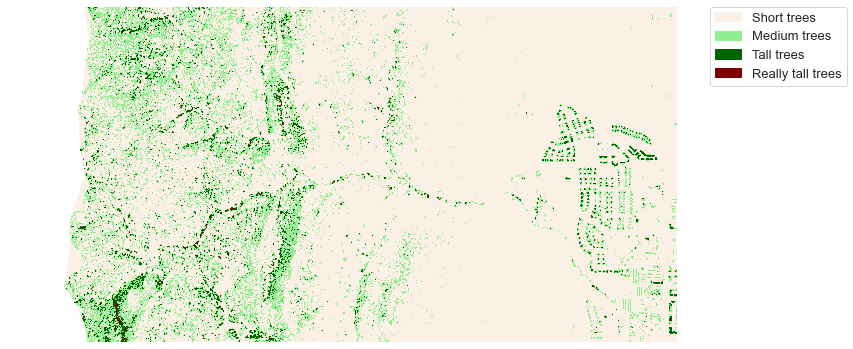

In [205]:
# Create a list of labels to use for your legend
height_class_labels = ["Short trees", "Medium trees",
                       "Tall trees", "Really tall trees"]

# Create a colormap from a list of colors
colors = ['linen', 'lightgreen', 'darkgreen', 'maroon']
cmap = ListedColormap(colors)

f, ax = plt.subplots(figsize=(12, 12))

im = ax.imshow(lidar_chm_class_ma,
               cmap=cmap)

ep.draw_legend(im, titles=height_class_labels)
ax.set_axis_off()

plt.show()

In [310]:
lidar_chm_im

masked_array(
  data=[[--, --, --, ..., 0.0, 0.1700439453125, 0.9600830078125],
        [--, --, --, ..., 0.0, 0.090087890625, 1.6400146484375],
        [--, --, --, ..., 0.0, 0.0, 0.0799560546875],
        ...,
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0],
        [--, --, --, ..., 0.0, 0.0, 0.0]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.402823e+38,
  dtype=float32)

## Export GeoTIff

In [311]:
print('CHM minimum value: ', lidar_chm_im.min())
print('CHM max value: ', lidar_chm_im.max())

CHM minimum value:  0.0
CHM max value:  26.930054


## Chapter 5 Exercise 

In [210]:
# Define relative paths to DTM and DSM files
p_dtm_path = os.path.join("./data", "colorado-flood", "spatial",
                        "boulder-leehill-rd", "post-flood", "lidar",
                        "post_DTM.tif")

p_dsm_path = os.path.join("./data", "colorado-flood", "spatial",
                        "boulder-leehill-rd", "post-flood", "lidar",
                        "post_DSM.tif")

# Open DTM and DSM files
with rio.open(p_dtm_path) as src:
    p_lidar_dtm_im = src.read(1, masked=True)
    p_spatial_extent = plotting_extent(src)

with rio.open(p_dsm_path) as src:
    p_lidar_dsm_im = src.read(1, masked=True)
    p_spatial_extent = plotting_extent(src)

# Create canopy height model (CHM)    
p_lidar_chm_im = p_lidar_dsm_im - p_lidar_dtm_im
p_lidar_chm_im

masked_array(
  data=[[0.02001953125, 0.0, 0.0, ..., 0.0, 0.0, 0.9801025390625],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 1.4000244140625],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        ...,
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
        [0.0400390625, 0.0, 0.0, ..., 0.0, 0.0, 0.0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)

In [211]:
# View min and max values in the data
print('CHM min value:', p_lidar_chm_im.min())
print('CHM max value:', p_lidar_chm_im.max())

CHM min value: 0.0
CHM max value: 27.439941


(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12f43f750>)

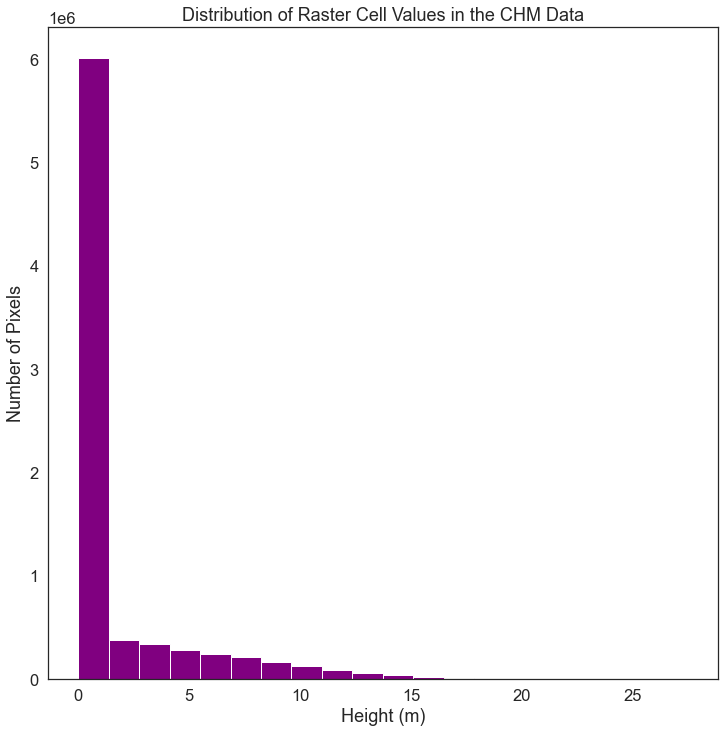

In [212]:
ep.hist(p_lidar_chm_im.ravel(),
        title="Distribution of Raster Cell Values in the CHM Data",
        xlabel="Height (m)",
        ylabel="Number of Pixels")

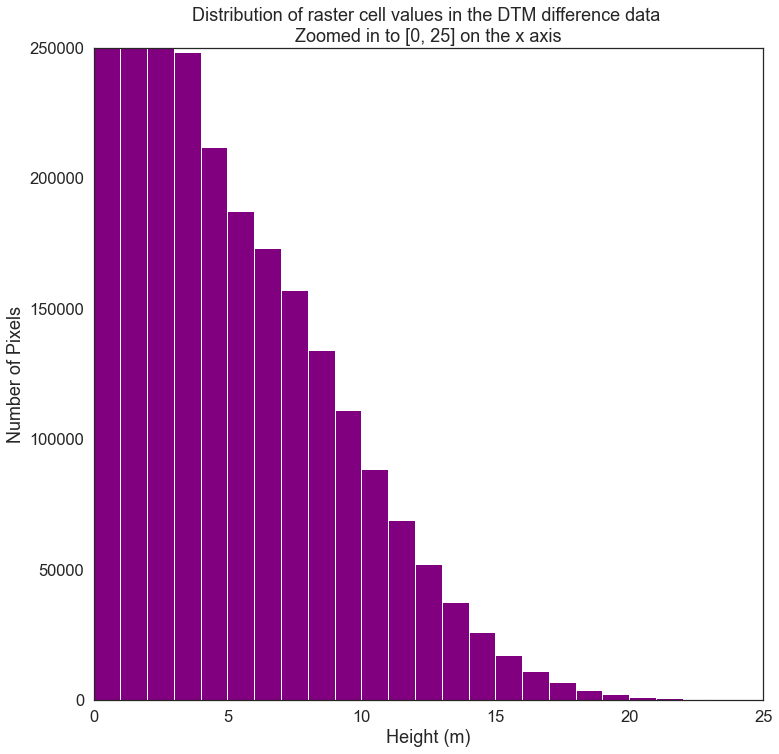

In [219]:
# Create histogram with xlim and ylim
xlim = [0, 25]

f, ax = ep.hist(p_lidar_chm_im.ravel(),
                hist_range=xlim,
                bins=range(*xlim),
                ylabel="Number of Pixels", xlabel="Height (m)",
                title="Distribution of raster cell values in the DTM difference data \n" +
                      "Zoomed in to {} on the x axis".format(xlim))

ax.set(xlim=xlim, ylim=[0, 250000])

plt.show()

In [216]:
# Define bins that you want, and then classify the data
class_bins = [p_lidar_chm_im.min(), 2, 7, 12, np.iinfo(np.int32).max]

# Classify the original image array, then unravel it again for plotting
p_lidar_chm_im_class = np.digitize(lidar_chm_im, class_bins)

# Note that you have an extra class in the data (0)
print(np.unique(p_lidar_chm_im_class))

[0 1 2 3 4]


In [241]:
p_lidar_chm_im.min()

0.0

**Very import step: Utilizing Masking** 

In [357]:
p_lidar_chm_class_ma = np.ma.masked_where(p_lidar_chm_im_class == 0,
                                        p_lidar_chm_im_class,
                                        copy=True)

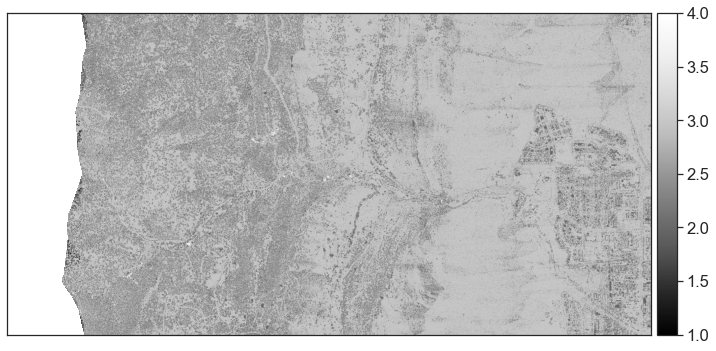

In [358]:
ep.plot_bands(p_lidar_chm_class_ma,
              scale=False)
plt.show()

In [221]:
p_canopy = lidar_chm_im - p_lidar_chm_im

In [252]:
p_canopy.min()

-24.45996

In [281]:
# Define bins that you want, and then classify the data
class_bins = [p_canopy.min(), -10, 0, 10, np.iinfo(np.int32).max]

# Classify the original image array, then unravel it again for plotting
p_lidar_chm_im_class = np.digitize(p_canopy, class_bins)


# Note that you have an extra class in the data (0)
print(np.unique(p_lidar_chm_im_class))

[0 1 2 3 4]


In [282]:
class_bins

[-24.45996, -10, 0, 10, 2147483647]

In [283]:
p_lidar_chm_im_class.min()

0

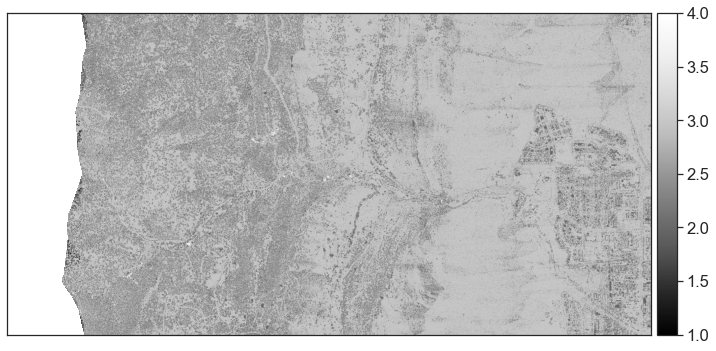

In [359]:
ep.plot_bands(p_lidar_chm_class_ma,
              scale=False)
plt.show()

In [285]:
height_class_labels

['major loss', 'minor loss', 'no difference', 'gain']

**Incomplete Color Visualization**

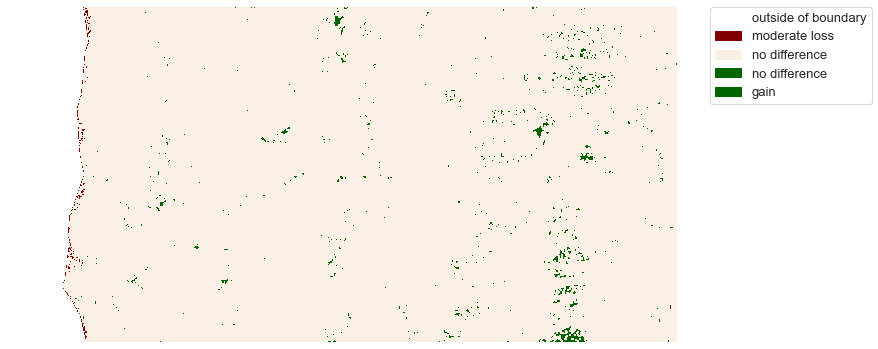

In [361]:
#needs to be updated 

# Create a list of labels to use for your legend
height_class_labels = ["outside of boundary","moderate loss", "no difference",
                       "no difference", "gain"]

# Create a colormap from a list of colors
colors = ['white', 'maroon','linen','darkgreen' ]
cmap = ListedColormap(colors)

f, ax = plt.subplots(figsize=(12, 12))

im = ax.imshow(p_lidar_chm_im_class,
               cmap=cmap)

ep.draw_legend(im, titles=height_class_labels)
ax.set_axis_off()

plt.show()

## Crop Raster Data

In [334]:
aoi = os.path.join("data", "colorado-flood", "spatial",
                   "boulder-leehill-rd", "clip-extent.shp")

lidar_chm_path = "./data/colorado-flood/spatial/outputs/lidar_chm.tiff"

# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file(aoi)

In [349]:
with rio.open(lidar_chm_path) as src:
    lidar_chm = src.read(1, masked=False)
    extent = plotting_extent(src)
    print('vector layer crs: ',src.crs)
    
print('crop extent crs: ', crop_extent.crs)


vector layer crs:  EPSG:32613
crop extent crs:  epsg:32613


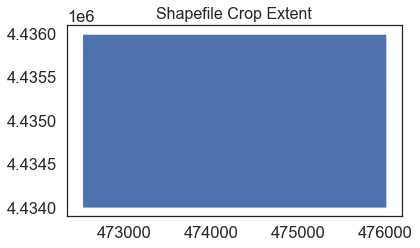

In [350]:
# Plot the crop boundary layer
# Note this is just an example so you can see what it looks like
# You don't need to plot this layer in your homework!
fig, ax = plt.subplots(figsize=(6, 6))

crop_extent.plot(ax=ax)

ax.set_title("Shapefile Crop Extent",
             fontsize=16)
plt.show()

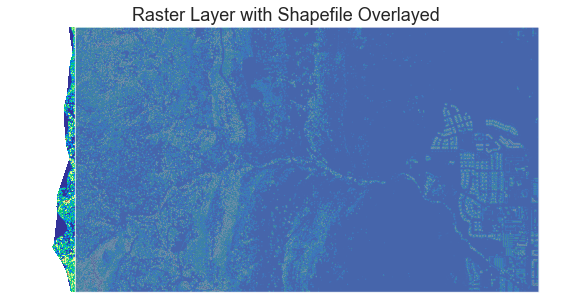

In [356]:
fig, ax = plt.subplots(figsize=(10, 8))

ep.plot_bands(p_lidar_chm_class_ma, cmap='terrain',
              extent=extent,
              ax=ax,
              title="Raster Layer with Shapefile Overlayed",
              cbar=False)

crop_extent.plot(ax=ax, alpha=.8)

ax.set_axis_off()

In [368]:
lidar_chm_path = os.path.join("data", "colorado-flood", "spatial",
                              "boulder-leehill-rd", "outputs", "lidar_chm.tif")

with rio.open(lidar_chm_path) as lidar_chm:
    lidar_chm_crop, lidar_chm_crop_meta = ep.es.crop_image(lidar_chm,crop_extent)
    lidar_chm_meta = lidar_chm.meta

lidar_chm_crop_affine = lidar_chm_crop_meta["transform"]

# Create spatial plotting extent for the cropped layer
lidar_chm_extent = plotting_extent(lidar_chm_crop[0], lidar_chm_crop_affine)

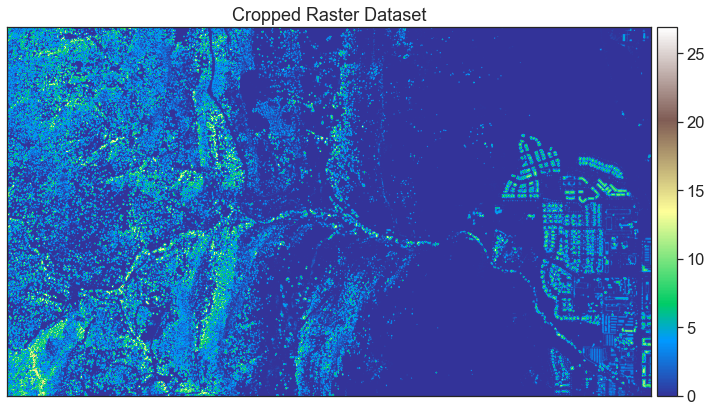

In [365]:
# Plot your data
ep.plot_bands(lidar_chm_crop[0],
              extent=lidar_chm_extent,
              cmap='terrain',
              title="Cropped Raster Dataset",
              scale=False)
plt.show()

In [372]:
lidar_chm.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': -1.7e+308,
 'width': 4000,
 'height': 2000,
 'count': 1,
 'crs': CRS.from_epsg(32613),
 'transform': Affine(1.0, 0.0, 472000.0,
        0.0, -1.0, 4436000.0)}

In [373]:
# Update with the new cropped affine info and the new width and height
lidar_chm_meta.update({'transform': lidar_chm_crop_affine,
                       'height': lidar_chm_crop.shape[1],
                       'width': lidar_chm_crop.shape[2],
                       'nodata': -999.99})

In [374]:
lidar_chm_meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': -999.99,
 'width': 3490,
 'height': 2000,
 'count': 1,
 'crs': CRS.from_epsg(32613),
 'transform': Affine(1.0, 0.0, 472510.0,
        0.0, -1.0, 4436000.0)}

In [375]:
# Write data
path_out = os.path.join("data", "colorado-flood", "spatial", 
                        "outputs", "lidar_chm_cropped.tif")

with rio.open(path_out, 'w', **lidar_chm_meta) as ff:
    ff.write(lidar_chm_crop[0], 1)

## Reproject Raster 

In [377]:
# Define relative path to file
lidar_dem_path = os.path.join("data", "colorado-flood", "spatial", 
                              "boulder-leehill-rd", "pre-flood", "lidar",
                              "pre_DTM.tif")

lidar_dem = rio.open(lidar_dem_path)
print(lidar_dem.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4000, 'height': 2000, 'count': 1, 'crs': CRS.from_epsg(32613), 'transform': Affine(1.0, 0.0, 472000.0,
       0.0, -1.0, 4436000.0)}


In [379]:
dst_crs = 'EPSG:3857' # CRS for web meractor 

projected_lidar_dem_path = os.path.join("data", "colorado-flood", "spatial", 
                                        "boulder-leehill-rd", "pre-flood", "lidar",
                                        "pre_DTM_reproject.tif")

with rio.open(lidar_dem_path) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rio.open(projected_lidar_dem_path, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rio.band(src, i),
                destination=rio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)
lidar_dem2 = rio.open(projected_lidar_dem_path)

print(lidar_dem2.meta)
lidar_dem2.close()

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4004, 'height': 2020, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(1.3063652820086313, 0.0, -11725101.307458913,
       0.0, -1.3063652820086313, 4876690.453258085)}


In [380]:
def reproject_et(inpath, outpath, new_crs):
    dst_crs = new_crs # CRS for web meractor 

    with rio.open(inpath) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rio.open(outpath, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)
reproject_et(inpath = os.path.join("data", "colorado-flood", "spatial", 
                                   "boulder-leehill-rd", "pre-flood", "lidar", "pre_DTM.tif"), 
             outpath = os.path.join("data", "colorado-flood", "spatial", 
                                    "boulder-leehill-rd", "pre-flood", "lidar", "pre_DTM_reproject_2.tif"), 
             new_crs = 'EPSG:3857')
projected_lidar_dem_path = os.path.join("data", "colorado-flood", "spatial", 
                                        "boulder-leehill-rd", "pre-flood", "lidar",
                                        "pre_DTM_reproject_2.tif")

# Check to make sure function worked, then close raster
lidar_dem3 = rio.open(projected_lidar_dem_path)
print(lidar_dem3.meta)

lidar_dem3.close()

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4004, 'height': 2020, 'count': 1, 'crs': CRS.from_epsg(3857), 'transform': Affine(1.3063652820086313, 0.0, -11725101.307458913,
       0.0, -1.3063652820086313, 4876690.453258085)}


# Chapter 6 

## Extract data from raster

In [381]:
# Load & plot the data
sjer_lidar_chm_path = os.path.join("data", "spatial-vector-lidar", 
                                   "california", "neon-sjer-site", 
                                   "2013", "lidar", "SJER_lidarCHM.tif")

with rio.open(sjer_lidar_chm_path) as sjer_lidar_chm_src:
    # Masked = True sets no data values to np.nan if they are in the metadata
    SJER_chm_data = sjer_lidar_chm_src.read(1, masked=True)
    sjer_chm_meta = sjer_lidar_chm_src.profile

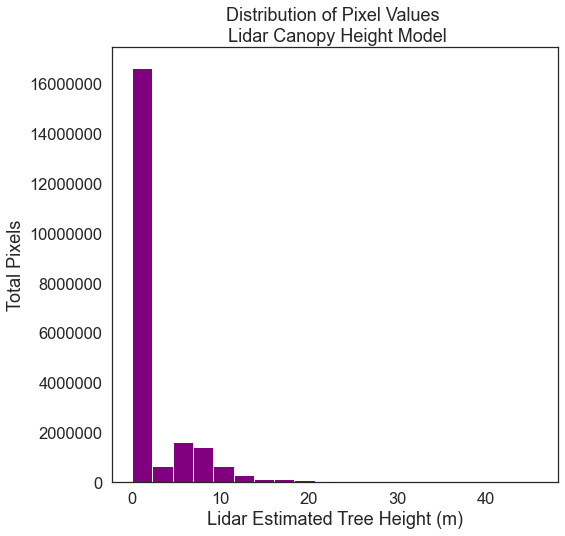

In [382]:
# Explore the data by plotting a histogram with earthpy
ax=ep.hist(SJER_chm_data,
        figsize=(8,8),
        colors="purple",
        xlabel="Lidar Estimated Tree Height (m)",
        ylabel="Total Pixels",
        title="Distribution of Pixel Values \n Lidar Canopy Height Model")

# Turn off scientific notation
ax[1].ticklabel_format(useOffset=False,
                     style='plain')

In [383]:
# EXPLORE: View summary statistics of canopy height model
# Notice the mean value with 0's included in the data
print('Mean:', np.nanmean(SJER_chm_data))
print('Max:', np.nanmax(SJER_chm_data))
print('Min:', np.nanmin(SJER_chm_data))

Mean: 1.9355862
Max: 45.879997
Min: 0.0


In [384]:
# CLEANUP: Set CHM values of 0 to NAN (no data or not a number)
SJER_chm_data[SJER_chm_data == 0] = np.nan

# View summary statistics of canopy height model after cleaning up the data
print('Mean:', np.nanmean(SJER_chm_data))
print('Max:', np.nanmax(SJER_chm_data))
print('Min:', np.nanmin(SJER_chm_data))

Mean: 8.213505
Max: 45.879997
Min: 2.0


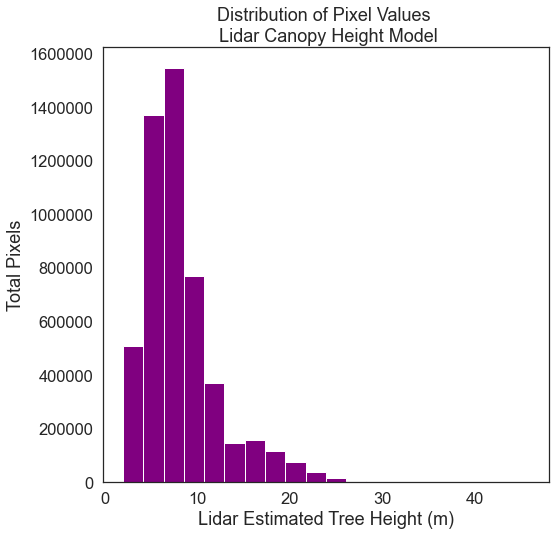

In [385]:
# Explore the data by plotting a histogram with earthpy
ax=ep.hist(SJER_chm_data,
        figsize=(8,8),
        colors="purple",
        xlabel="Lidar Estimated Tree Height (m)",
        ylabel="Total Pixels",
        title="Distribution of Pixel Values \n Lidar Canopy Height Model")

# Turn off scientific notation
ax[1].ticklabel_format(useOffset=False,
                     style='plain')

In [386]:
sjer_centroids_path = os.path.join("data", "spatial-vector-lidar", 
                                   "california", "neon-sjer-site", 
                                   "vector_data", "SJER_plot_centroids.shp")

SJER_plots_points = gpd.read_file(sjer_centroids_path)

In [387]:
SJER_plots_points.geom_type.head()

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object